In [1]:
import numpy as np

In [2]:
def aitken(x_list, y_list, x):
    n = len(x_list)
    polynomial = np.array([[0.0]*n for _ in range(n)])
    np.fill_diagonal(polynomial, y_list)
    for i in range(1, n):
        for j in range(n - i):
            polynomial[j, i+j] = ((x - x_list[i+j])*polynomial[j][i+j-1] - 
                                  (x - x_list[j])*polynomial[j+1][i+j])/(x_list[j]-x_list[j+i])
    return polynomial[0][n-1]

In [3]:
def aitken_list(x_list, y_list, x_vector):
    return [aitken(x_list, y_list, x) for x in x_vector]

In [4]:
x_list = np.linspace(-np.pi/2, np.pi/2, 20)
y_list = np.sin(x_list)
ait = aitken(x_list, y_list, np.pi/4)
exact = np.sin(np.pi/4)
print('Значение, полученное с помощью интерполяции: ', ait)
print('Точное значение: ', exact)
print('Невязка: ', exact - ait)

Значение, полученное с помощью интерполяции:  0.7071067811865476
Точное значение:  0.7071067811865475
Невязка:  -1.1102230246251565e-16


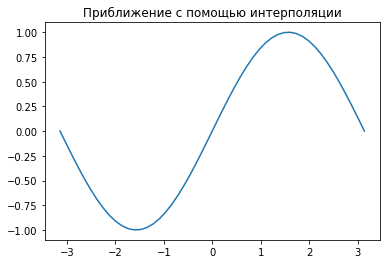

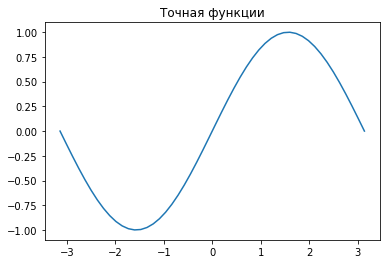

In [5]:
import matplotlib.pyplot as plt
space = np.linspace(-np.pi, np.pi)
plt.figure(1)
plt.title('Приближение с помощью интерполяции')
plt.plot(space, aitken_list(x_list, y_list, space))
plt.figure(2)
plt.title('Точная функции')
plt.plot(space, np.sin(space))
plt.show()